In [3]:
from util import *
from metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data_2009 = pd.read_csv("data/2009_grouped.csv")
data_2009.head(10)

,month,day_of_week,airline,ORIGIN,DEST,num_of_flights,avg_delay
0,1,0,9E,ABE,DTW,8,3.875000
1,1,0,9E,ATL,AUS,7,-2.571429
2,1,0,9E,ATL,BHM,1,35.000000
3,1,0,9E,ATL,BNA,6,-4.833333
4,1,0,9E,ATL,BUF,4,7.750000
5,1,0,9E,ATL,CAE,1,-2.000000
6,1,0,9E,ATL,CHS,1,-18.000000
7,1,0,9E,ATL,CLE,4,10.250000
8,1,0,9E,ATL,CLT,3,0.666667
9,1,0,9E,ATL,DAY,5,21.000000


In [5]:
data_2009.loc[(data_2009.ORIGIN == 'BZN') & (data_2009.DEST == 'LAX')]

,month,day_of_week,airline,ORIGIN,DEST,num_of_flights,avg_delay
3304,1,0,OO,BZN,LAX,1,3.00
38038,1,6,OO,BZN,LAX,4,-0.75
78674,2,6,OO,BZN,LAX,4,-3.75
118719,3,6,OO,BZN,LAX,4,-4.50


In [6]:
G_2009 = create_graph(data_2009)
deg_dist = np.array(list(dict(G_2009.degree(weight="num_of_flights")).values()))
print(list(dict(G_2009.degree(weight="num_of_flights")).values()))

[8071, 834906, 111993, 233290, 304156, 124539, 241880, 627617, 4980, 528794, 71159, 13298, 56068, 201851, 96416, 471375, 41529, 105664, 132774, 364185, 307977, 385795, 16006, 13049, 100800, 168093, 239491, 99415, 104493, 366993, 165480, 201870, 273020, 263368, 117393, 138002, 43568, 1992, 685, 239145, 2105, 6734, 2064, 91379, 1044, 206, 35579, 1262, 5895, 143434, 6213, 20022, 154, 24038, 115349, 159641, 237204, 185697, 661, 2052, 1448, 154, 8468, 112933, 8501, 41259, 2164, 2158, 1400, 9409, 10609, 83689, 9169, 4280, 47514, 42402, 7713, 884, 9646, 108218, 27155, 220923, 1913, 17338, 12049, 49399, 7878, 17688, 9436, 2614, 25882, 18096, 60979, 26409, 7109, 2788, 4295, 28743, 2771, 30247, 4377, 9522, 1957, 2199, 6125, 4322, 1444, 15815, 10407, 4833, 10585, 4832, 13176, 3878, 27943, 20169, 20337, 1541, 2400, 3451, 21318, 21554, 26529, 6965, 76399, 7379, 25058, 57623, 645, 16783, 10265, 200657, 34721, 5530, 115, 1744, 13315, 1344, 8286, 29510, 127892, 89086, 3894, 15851, 4629, 13382, 25799, 

In [6]:
print(G_2009)

DiGraph with 296 nodes and 4619 edges


In [7]:
airports = [airport for airport in G_2009.nodes]
print(airports)
print(len(airports))
airportsDict = {k: v for v, k in enumerate(airports)}
print(airportsDict)

['ABE', 'ATL', 'CLE', 'CLT', 'DTW', 'FLL', 'MCO', 'ORD', 'ABI', 'DFW', 'ABQ', 'AMA', 'BUR', 'BWI', 'DAL', 'DEN', 'ELP', 'HOU', 'IAD', 'IAH', 'LAS', 'LAX', 'LBB', 'MAF', 'MCI', 'MDW', 'MSP', 'OAK', 'PDX', 'PHX', 'SAN', 'SEA', 'SFO', 'SLC', 'STL', 'TPA', 'TUS', 'ABY', 'ACK', 'JFK', 'ACT', 'ACV', 'CEC', 'SMF', 'ACY', 'ADK', 'ANC', 'ADQ', 'AEX', 'MEM', 'AGS', 'CAE', 'AKN', 'ALB', 'CVG', 'DCA', 'EWR', 'PHL', 'ALO', 'BET', 'CDV', 'DLG', 'FAI', 'HNL', 'JNU', 'OGG', 'OME', 'OTZ', 'SCC', 'ASE', 'ATW', 'AUS', 'AVL', 'AVP', 'BDL', 'BHM', 'BIL', 'BKG', 'BMI', 'BNA', 'BOI', 'BOS', 'BQK', 'BTR', 'BTV', 'BUF', 'BZN', 'CAK', 'CHA', 'CHO', 'CHS', 'CID', 'CMH', 'COS', 'CRW', 'CSG', 'DAB', 'DAY', 'DHN', 'DSM', 'EGE', 'EVV', 'EWN', 'EYW', 'FAY', 'FCA', 'FLO', 'FNT', 'FSD', 'FSM', 'FWA', 'GNV', 'GPT', 'GRK', 'GRR', 'GSO', 'GSP', 'GTR', 'GUC', 'HDN', 'HPN', 'HSV', 'ICT', 'ILM', 'IND', 'JAC', 'JAN', 'JAX', 'LAW', 'LEX', 'LFT', 'LGA', 'LIT', 'LNK', 'LWB', 'LYH', 'MDT', 'MEI', 'MGM', 'MHT', 'MIA', 'MKE', 'MLB'

In [8]:
for airport in airports:
    for neighbor in list(G_2009.neighbors(airport)):
        if (type(G_2009.get_edge_data(neighbor, airport, 'num_of_flights')) == str):
            print(neighbor, airport)
            print(G_2009.get_edge_data(neighbor, airport, 'num_of_flights'))

STT ORD
num_of_flights
BUR ABQ
num_of_flights
GRK HOU
num_of_flights
STT IAD
num_of_flights
AGS IAH
num_of_flights
OMA MCI
num_of_flights
CWA MSP
num_of_flights
PSC SEA
num_of_flights
ICT TUS
num_of_flights
MRY SMF
num_of_flights
CAE AGS
num_of_flights
PIT DCA
num_of_flights
PHL EWR
num_of_flights
ORF PHL
num_of_flights
PWM PHL
num_of_flights
SEA CDV
num_of_flights
SCC FAI
num_of_flights
BRW SCC
num_of_flights
FSD AUS
num_of_flights
PIA AVP
num_of_flights
HSV BNA
num_of_flights
PIA BNA
num_of_flights
MFR BOI
num_of_flights
LNK BZN
num_of_flights
DAY CMH
num_of_flights
ABQ COS
num_of_flights
LNK DSM
num_of_flights
FNT GRR
num_of_flights
FAR LEX
num_of_flights
FSD LEX
num_of_flights
BNA LNK
num_of_flights
SDF LNK
num_of_flights
CRW LWB
num_of_flights
ABE MDT
num_of_flights
FLL MIA
num_of_flights
MLI PIA
num_of_flights
ACK PVD
num_of_flights
PIA SBN
num_of_flights
SGF SDF
num_of_flights
DRO SGF
num_of_flights
XNA SGF
num_of_flights
MRY SJC
num_of_flights
SJU STT
num_of_flights
HPN SYR
num

In [9]:
flightMatrix = []
for airport in airports:
    currentAirportList = [0]*len(airports)
    for neighbor in list(G_2009.neighbors(airport)):
        
        currentAirportList[airportsDict[neighbor]] = G_2009.get_edge_data(airport, neighbor, 'num_of_flights')['num_of_flights']
        
#         if type(G_2009.get_edge_data(neighbor, airport, 'num_of_flights')) == str:
#             print("1", neighbor, airport)
#             currentAirportList.append(0)
            
#         elif neighbor == airports[index]:
#             currentAirportList.append(G_2009.get_edge_data(neighbor, airport, 'num_of_flights')['num_of_flights'])
#         else:
#             print("2", neighbor, airport)
#             currentAirportList.append(0)
    flightMatrix.append(currentAirportList)
print(flightMatrix)
npFlightMatrix = np.matrix(flightMatrix)
print(npFlightMatrix)

[[0, 785, 508, 397, 989, 62, 125, 1168, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [785, 0, 2935, 6561, 5076, 7930, 9508, 7071, 0, 9697, 1020, 0, 0, 6112, 0, 5218, 819, 4228, 508

In [10]:
# for i in G_2009.nodes():
#     for j in list(G_2009.neighbors(i)):
#         print(i, j, (G_2009.get_edge_data(i,j, 'num_of_flights'))['num_of_flights'])
# 'ABE', 'ATL', 'CLE', 'CLT', 'DTW', 'FLL', 'MCO', 'ORD', 'ABI', 'DFW', 'ABQ', 'AMA', 'BUR', 'BWI', 'DAL', 'DEN', 'ELP', 'HOU', 'IAD', 'IAH', 'LAS', 'LAX'   
# 785, 0, 2935, 6561, 5076, 7930, 9508, 7071, 0, 9697, 1020, 0, 0, 6112, 0, 5218, 819, 4228, 5081, 5519, 4280, 4953, 0, 0, 4262, 4071, 5813, 0, 1075, 3937, 2251, 2580, 3125, 2768, 4083, 7191, 692, 997, 0, 2107, 0, 0, 0, 677, 405, 0, 89, 0, 1038, 4886,

In [11]:
print(calculate_network_efficiency(G_2009))

0.30932432432421464


In [12]:
def top_eigenvector_centrality(G, x=1):
    # Compute the eigenvector centrality of the graph
    eigenvector_centrality = nx.eigenvector_centrality(G)

    # Sort the nodes based on their eigenvector centrality score
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

    # Return the x nodes with the best eigenvector centrality
    return [(node, eigenvector_centrality[node]) for node in sorted_nodes[:x]]

In [13]:
print(top_eigenvector_centrality(G_2009, x=5))

[('ATL', 0.20221202679231196), ('ORD', 0.19435834484521805), ('DFW', 0.18261644787664838), ('DTW', 0.17997691784627193), ('DEN', 0.17369604369412095)]


In [14]:
"""If you want to continue with the analysis of the targeted attack tolerance of your network of airports and flights, you can use the graph-theoretic metrics discussed earlier to identify the most important nodes in the network. This can help you understand which nodes are critical to the network's connectivity and which nodes are less important.

Once you have identified the most important nodes in the network, you can evaluate the impact of removing them from the network. This can be done by simulating the removal of the nodes and measuring the effect on the connectivity of the network. For example, you could measure the change in the number of connected components, the average shortest path length, or the diameter of the network.

Based on the results of these simulations, you can determine the targeted attack tolerance of the network and identify potential vulnerabilities. This information can be useful for identifying potential weaknesses in the network and for planning strategies to improve its resilience to targeted attacks.
"""

"If you want to continue with the analysis of the targeted attack tolerance of your network of airports and flights, you can use the graph-theoretic metrics discussed earlier to identify the most important nodes in the network. This can help you understand which nodes are critical to the network's connectivity and which nodes are less important.\n\nOnce you have identified the most important nodes in the network, you can evaluate the impact of removing them from the network. This can be done by simulating the removal of the nodes and measuring the effect on the connectivity of the network. For example, you could measure the change in the number of connected components, the average shortest path length, or the diameter of the network.\n\nBased on the results of these simulations, you can determine the targeted attack tolerance of the network and identify potential vulnerabilities. This information can be useful for identifying potential weaknesses in the network and for planning strateg

In [15]:
# Create a function to calculate the average shortest path length with and without the top X nodes with the highest degrees
def average_shortest_path_length(G, x=1):
    # Create a copy of the graph
    G_copy = G.copy()

    # Compute the degree of each node
    degrees = dict(G_copy.degree())

    # Sort the nodes based on their degree
    sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)

    # Calculate the average shortest path length in the original graph
    avg_shortest_path_length = nx.average_shortest_path_length(G_copy)

    # Remove the top x nodes with the highest degrees from the copy of the graph
    for node in sorted_nodes[:x]:
        G_copy.remove_node(node)

    # Calculate the average shortest path length in the copy of the graph without the
    # top x nodes with the highest degrees
    avg_shortest_path_length_without_top_x = nx.average_shortest_path_length(G_copy)

    # Return the average shortest path length in the original graph and in the
    # copy of the graph without the top x nodes with the highest degrees
    return avg_shortest_path_length, avg_shortest_path_length_without_top_x

In [16]:
# print(average_shortest_path_length(G_2009, x=1)) # graphi s not weakly connected

In [17]:
print(dict(G_2009.degree()))

{'ABE': 15, 'ATL': 330, 'CLE': 120, 'CLT': 152, 'DTW': 248, 'FLL': 117, 'MCO': 152, 'ORD': 280, 'ABI': 2, 'DFW': 268, 'ABQ': 63, 'AMA': 12, 'BUR': 23, 'BWI': 124, 'DAL': 38, 'DEN': 236, 'ELP': 32, 'HOU': 65, 'IAD': 131, 'IAH': 203, 'LAS': 158, 'LAX': 158, 'LBB': 16, 'MAF': 16, 'MCI': 75, 'MDW': 104, 'MSP': 237, 'OAK': 54, 'PDX': 80, 'PHX': 166, 'SAN': 80, 'SEA': 114, 'SFO': 140, 'SLC': 194, 'STL': 108, 'TPA': 114, 'TUS': 33, 'ABY': 2, 'ACK': 3, 'JFK': 130, 'ACT': 2, 'ACV': 9, 'CEC': 4, 'SMF': 51, 'ACY': 4, 'ADK': 2, 'ANC': 55, 'ADQ': 2, 'AEX': 8, 'MEM': 170, 'AGS': 6, 'CAE': 21, 'AKN': 2, 'ALB': 36, 'CVG': 180, 'DCA': 95, 'EWR': 161, 'PHL': 111, 'ALO': 2, 'BET': 2, 'CDV': 5, 'DLG': 2, 'FAI': 9, 'HNL': 48, 'JNU': 16, 'OGG': 29, 'OME': 4, 'OTZ': 4, 'SCC': 4, 'ASE': 13, 'ATW': 14, 'AUS': 73, 'AVL': 16, 'AVP': 11, 'BDL': 54, 'BHM': 50, 'BIL': 10, 'BKG': 6, 'BMI': 14, 'BNA': 93, 'BOI': 29, 'BOS': 110, 'BQK': 2, 'BTR': 8, 'BTV': 18, 'BUF': 42, 'BZN': 17, 'CAK': 20, 'CHA': 10, 'CHO': 4, 'CHS'

In [18]:
#print(nx.eigenvector_centrality(G_2009))

In [19]:
def mean_degree(G):
    degrees = [d for n, d in G.degree()]
    mean_degree = sum(degrees) / len(degrees)
    return mean_degree

In [20]:
print(mean_degree(G_2009))

31.20945945945946


In [21]:
def to_undirected_graph(G):
    # Create a new undirected graph
    H = nx.Graph()

    # Iterate over the edges in the original directed graph
    for u, v, w in G.edges(data='num_of_flights'):
        # Check if the edge from v to u exists in the original graph
        if (v, u) in G.edges():
            # If the edge exists, add it to the new undirected graph
            # with the num_of_flight equal to the sum of the num_of_flight
            # of the corresponding edges in the original directed graph
            H.add_edge(u, v, num_of_flights=w + G[v][u]['num_of_flights'])
        else:
            # If the edge does not exist, add it to the new undirected
            # graph with the num_of_flight equal to the num_of_flight
            # of the edge from u to v in the original directed graph
            H.add_edge(u, v, num_of_flights=w)

    # Return the new undirected graph
    return H


In [22]:
G_2009_undirected = to_undirected_graph(G_2009)

G_2009_undirected = to_undirected_graph(G_2009)

In [23]:
print(G_2009_undirected.edges(data='num_of_flights'))

[('ABE', 'ATL', 1570), ('ABE', 'CLE', 1017), ('ABE', 'CLT', 794), ('ABE', 'DTW', 1979), ('ABE', 'FLL', 124), ('ABE', 'MCO', 250), ('ABE', 'ORD', 2336), ('ABE', 'MDT', 1), ('ATL', 'ABQ', 2040), ('ATL', 'ABY', 1992), ('ATL', 'ACY', 809), ('ATL', 'AEX', 2076), ('ATL', 'AGS', 6187), ('ATL', 'ALB', 2066), ('ATL', 'ANC', 178), ('ATL', 'ASE', 200), ('ATL', 'ATW', 1092), ('ATL', 'AUS', 4344), ('ATL', 'AVL', 6078), ('ATL', 'AVP', 457), ('ATL', 'BDL', 4144), ('ATL', 'BHM', 8451), ('ATL', 'BIL', 155), ('ATL', 'BKG', 794), ('ATL', 'BMI', 5477), ('ATL', 'BNA', 6938), ('ATL', 'BOI', 18), ('ATL', 'BOS', 12128), ('ATL', 'BQK', 1913), ('ATL', 'BTR', 4825), ('ATL', 'BTV', 611), ('ATL', 'BUF', 5925), ('ATL', 'BWI', 12239), ('ATL', 'BZN', 106), ('ATL', 'CAE', 6798), ('ATL', 'CAK', 7725), ('ATL', 'CHA', 5958), ('ATL', 'CHO', 1918), ('ATL', 'CHS', 9036), ('ATL', 'CID', 443), ('ATL', 'CLE', 6244), ('ATL', 'CLT', 13109), ('ATL', 'CMH', 5318), ('ATL', 'COS', 877), ('ATL', 'CRW', 3175), ('ATL', 'CSG', 2788), ('

In [24]:
from collections import Counter

def analyze_degree_distribution(G):
    # Compute the in-degree and out-degree centralities for each node
    indeg_centralities = nx.in_degree_centrality(G)
    outdeg_centralities = nx.out_degree_centrality(G)

    # Count the number of nodes with each in-degree and out-degree
    indeg_counts = Counter(dict(G.in_degree()).values())
    outdeg_counts = Counter(dict(G.out_degree()).values())

    # Compute the probability of a node having each in-degree and out-degree
    indeg_probs = {k: v / G.number_of_nodes() for k, v in indeg_counts.items()}
    outdeg_probs = {k: v / G.number_of_nodes() for k, v in outdeg_counts.items()}

    # Return the in-degree and out-degree probabilities
    return indeg_probs, outdeg_probs

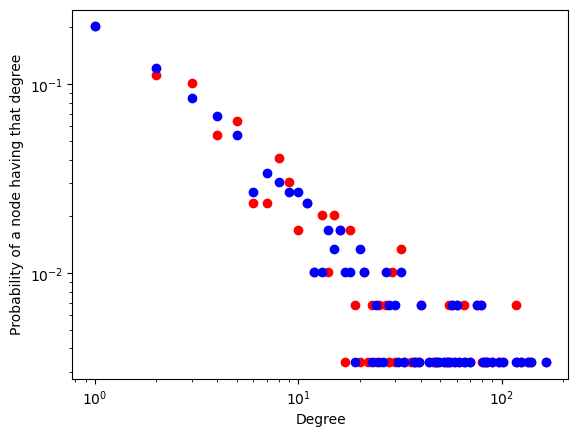

In [26]:
indeg_probs, outdeg_probs = analyze_degree_distribution(G_2009)

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'ro')
plt.loglog(outdeg_probs.keys(), outdeg_probs.values(), 'bo')
plt.xlabel('Degree')
plt.ylabel('Probability of a node having that degree')
plt.show()

In [1]:
import networkx as nx
from collections import Counter

def analyze_degree_distribution(G):
    # Compute the in-degree and out-degree centralities for each node
    indeg_centralities = nx.in_degree_centrality(G)
    outdeg_centralities = nx.out_degree_centrality(G)

    # Count the number of nodes with each in-degree and out-degree
    indeg_counts = Counter(dict(G.in_degree()).values())
    outdeg_counts = Counter(dict(G.out_degree()).values())

    # Compute the probability of a node having each in-degree and out-degree
    indeg_probs = {k: v / G.number_of_nodes() for k, v in indeg_counts.items()}
    outdeg_probs = {k: v / G.number_of_nodes() for k, v in outdeg_counts.items()}

    # Compute the cumulative in-degree and out-degree probabilities
    indeg_cumulative_probs = {}
    outdeg_cumulative_probs = {}
    cum_prob = 0.0
    for k in sorted(indeg_probs.keys(), reverse=True):
        cum_prob += indeg_probs[k]
        indeg_cumulative_probs[k] = cum_prob
    cum_prob = 0.0
    for k in sorted(outdeg_probs.keys(), reverse=True):
        cum_prob += outdeg_probs[k]
        outdeg_cumulative_probs[k] = cum_prob

    # Return the cumulative in-degree and out-degree probabilities
    return indeg_cumulative_probs, outdeg_cumulative_probs

{165: 0.0033783783783783786, 140: 0.006756756756756757, 134: 0.010135135135135136, 124: 0.013513513513513514, 118: 0.02027027027027027, 101: 0.02364864864864865, 97: 0.02702702702702703, 90: 0.030405405405405407, 85: 0.033783783783783786, 83: 0.037162162162162164, 80: 0.04054054054054054, 79: 0.0472972972972973, 76: 0.05405405405405406, 70: 0.057432432432432436, 65: 0.0641891891891892, 62: 0.06756756756756757, 60: 0.07432432432432433, 59: 0.07770270270270271, 57: 0.08445945945945947, 55: 0.09121621621621623, 54: 0.0945945945945946, 52: 0.09797297297297297, 48: 0.10135135135135134, 47: 0.10472972972972971, 46: 0.10810810810810809, 44: 0.11148648648648646, 40: 0.11824324324324322, 39: 0.1216216216216216, 37: 0.12499999999999997, 36: 0.12837837837837834, 33: 0.13175675675675672, 32: 0.14527027027027023, 30: 0.1486486486486486, 29: 0.15878378378378374, 28: 0.16216216216216212, 27: 0.16891891891891886, 25: 0.1756756756756756, 24: 0.17905405405405397, 23: 0.18581081081081074, 22: 0.189189189

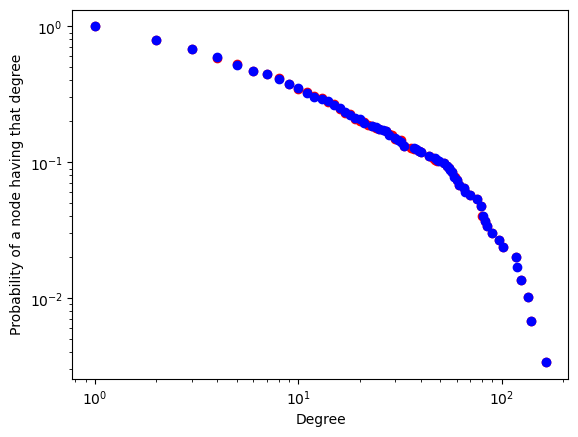

In [7]:
indeg_probs, outdeg_probs = analyze_degree_distribution(G_2009)
print(indeg_probs)

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'ro')
plt.loglog(outdeg_probs.keys(), outdeg_probs.values(), 'bo')
plt.xlabel('Degree')
plt.ylabel('Probability of a node having that degree')
plt.show()